# 데이터의 관계를 표현하는 산점도

## 1. 라이브러리와 데이터 불러오기

In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
[f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name]
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus']= False

## 2. 스캐터플롯
* 점의 크기, 색깔로 정보를 표현할 수 있다.(버블차트)
* 크기는 s, 색깔은 x로 지정한다.

### 2.1. 기본

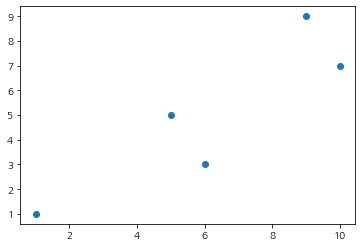

In [ ]:
x=[1,5,6,9,10]
y=[1,5,3,9,7]
plt.scatter(x,y)

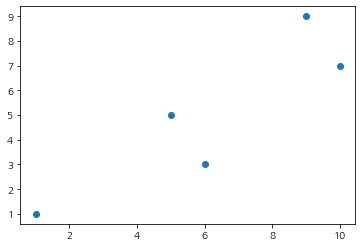

In [ ]:
plt.plot(x,y,'o')
# 같음

### 2.2. 점의 크기
s=크기공통지정

s=크기목록
* plt.scatter()의 파라미터 s로 점 크기를 지정한다.
* 점 크기는 공통된 크기로 지정할 수도 있고, 점마다 다른 크기로 지정할 수도 있다.

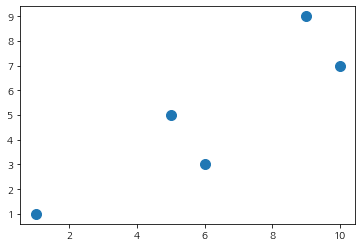

In [ ]:
plt.scatter(x,y,s=100)

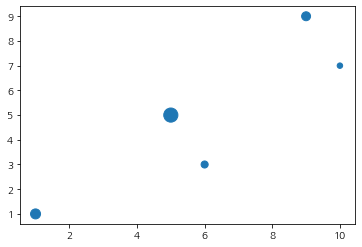

In [ ]:
plt.scatter(x,y,s=[100,200,50,80,30])

### 2.3. 점의 색상

#### 2.3.1. 단일색 지정

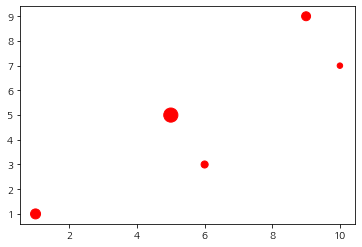

In [ ]:
plt.scatter(x,y,s=[100,200,50,80,30], c='r')

#### 2.3.2. 값에 따른 색상 지정

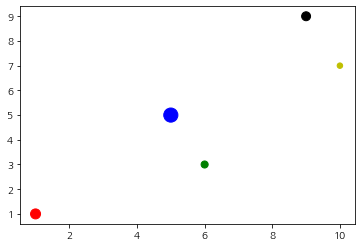

In [ ]:
plt.scatter(x,y,s=[100,200,50,80,30], c=['r','b','g','k','y'])

#### 2.3.3. 컬러맵으로 색상 지정
* 컬러맵 지정: cmap=컬러맵
* 컬러바 표시 : plt.colorbar()

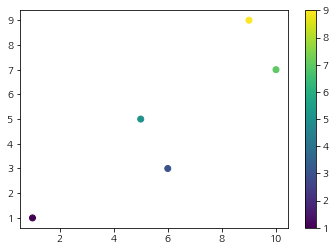

In [ ]:
# 기본 컬러맵
# y가 아닌 다른 데이터를 추가한다면 그데이터에 따른 색변화를 볼 수있음
plt.scatter(x,y,c=y)
plt.colorbar()

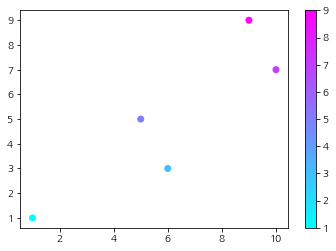

In [ ]:
# 다른 컬러맵 적용
plt.scatter(x,y,c=y, cmap='cool')
plt.colorbar()

In [ ]:
# 컬러맵 종류
plt.colormaps()

## 3. 산점도 예제

### 3.1. 데이터 준비
* 어느 레스토랑의 팁 데이터
* 지불 금액, 팁, 성별, 흡연여부, 요일, 시간대, 테이블 인원

In [ ]:
import seaborn as sns
tips= sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.shape

(244, 7)

### 3.2. 지불금액과 팁의 관계
* 서로 비례할까?

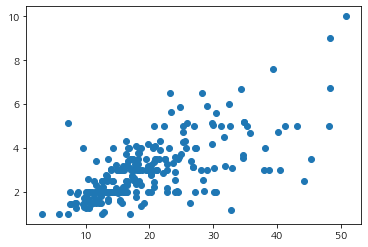

In [ ]:
plt.scatter(tips['total_bill'],tips['tip'])
# 비례한다.

### 3.3. 점의 크기로 테이블 인원 표시

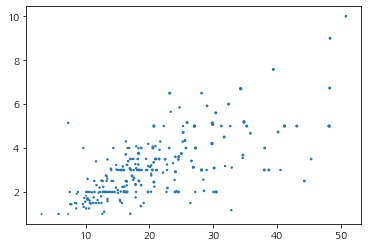

In [ ]:
plt.scatter(tips['total_bill'],tips['tip'], s=tips['size'])

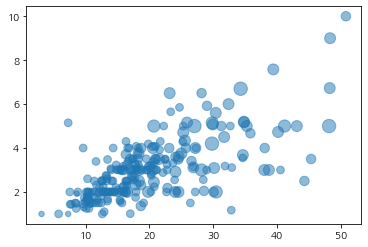

In [ ]:
# 좀더 보기 편하게
plt.scatter(tips['total_bill'],tips['tip'], s=tips['size']*30, alpha=0.5)

### 3.4. 점의 색으로 성별 표시

In [ ]:
# 성별에 따른 color 컬럼 추가
def set_color(x):
    if x=='Male':
        return 'blue'
    elif x=='Female':
        return 'red'
tips['color']=tips['sex'].apply(set_color)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,color
0,16.99,1.01,Female,No,Sun,Dinner,2,red
1,10.34,1.66,Male,No,Sun,Dinner,3,blue
2,21.01,3.50,Male,No,Sun,Dinner,3,blue
3,23.68,3.31,Male,No,Sun,Dinner,2,blue
4,24.59,3.61,Female,No,Sun,Dinner,4,red


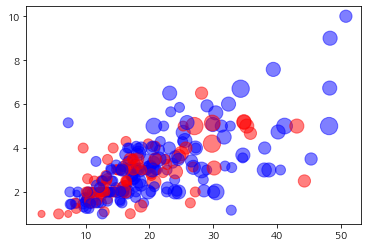

In [ ]:
plt.scatter(tips['total_bill'],tips['tip'], s=tips['size']*50, alpha=0.5, c=tips['color'])

# 색으로 값의 크기를 표현하는 히트맵

## 1. 히트맵
* plt.pcolor(2차원데이터)

In [ ]:
# 샘플데이터
import numpy as np
import pandas as pd
arr = np.random.standard_normal((5,5))
df = pd.DataFrame(arr)
df

,0,1,2,3,4
0,-0.937507,-0.485641,-0.713328,2.132069,-0.721343
1,-0.197847,-1.012664,0.856391,0.331202,-0.526866
2,-0.353156,1.445794,-0.878341,0.001568,1.285529
3,0.883012,-1.629624,-0.335413,0.894693,1.033035
4,-1.678136,1.922038,-0.789891,-1.128578,1.227535


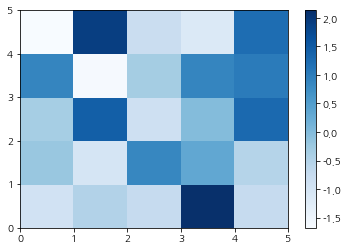

In [ ]:
# 히트맵 그리기
plt.pcolor(df, cmap='Blues')
plt.colorbar()
# df의 1행은 히트맵에서 맨 밑의 칸이다.

## 2. 히트맵 예제
* 타이타닉호의 연령대_객실등급별 승선자수

### 2.1 데이터 준비

In [ ]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### 2.2. 데이터 전처리

#### 2.2.1 결측치 처리

In [ ]:
titanic.isnull().sum()
# deck           688은 쓸모 없어보임

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# 컬럼 삭제
titanic = titanic.drop(columns=["deck"])

In [ ]:
# 결측치 삭제
titanic = titanic.dropna()

In [ ]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
titanic.shape

(712, 14)

#### 2.2.2. 연령대 컬럼 생성

In [ ]:
titanic['agerange']=(titanic['age']/10).astype('int')*10
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,agerange
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,20
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,30
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,20
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,30
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False,30
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True,20
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True,10
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,20


#### 2.3.3. 피벗테이블 : 연령대-객실등급 별 승객 수

In [ ]:
# 행에는 class 열에는 agerange를 가지는 데이터프레임 만들어주기
titanic_pivot = titanic.pivot_table(index='class',columns='agerange',values='who',aggfunc='count')
titanic_pivot

agerange,0,10,20,30,40,50,60,70,80
class,,,,,,,,,
First,3,18,34,49,37,27,12,3,1
Second,17,18,53,48,18,15,3,1,0
Third,42,66,133,69,34,6,3,2,0


### 2.3. 히트맵

#### 2.3.1. matplotlib

([<matplotlib.axis.XTick at 0x7f7ee80b08d0>,
 <a list of 9 Text major ticklabel objects>)

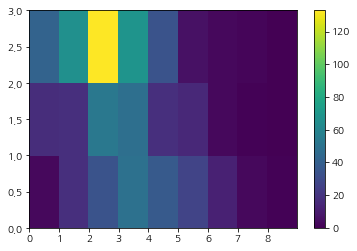

In [ ]:
plt.pcolor(titanic_pivot)
plt.colorbar()

# 레이블 설정
plt.xticks(range(0,len(titanic_pivot.columns),1))

# 틱의 위치를 가운데로 옮기자

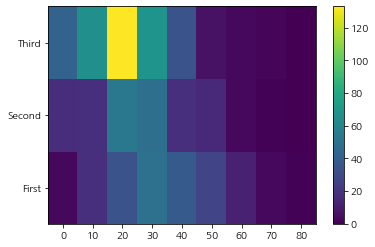

In [ ]:
plt.pcolor(titanic_pivot)
plt.colorbar()
# 레이블 설정
plt.xticks(np.arange(0.5,len(titanic_pivot.columns),1), labels=titanic_pivot.columns)
plt.yticks(np.arange(0.5,len(titanic_pivot.index),1), labels=titanic_pivot.index)
plt.show()
# 3등석의 20대가 가장 많다.

#### 2.3.2. seaborn
* heatmap(data=2차원데이터)
* cmap = 컬러맵
* annot=True: 수치 표시
* fmt='d': 정수로 표시

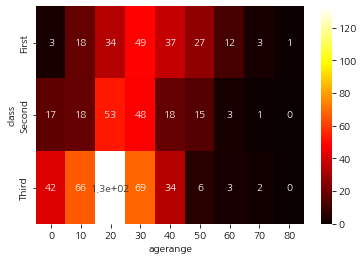

In [ ]:
sns.heatmap(titanic_pivot,cmap='hot', annot=True)

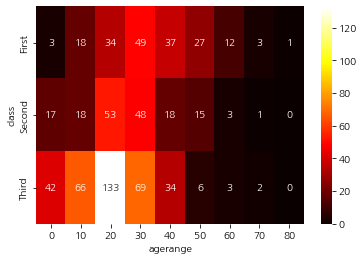

In [ ]:
sns.heatmap(titanic_pivot,cmap='hot', annot=True, fmt='d')